##**MILESTONE :**

By : Muhammad Rizki Herfian

#**IMPORT LIBRARY :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
from numpy import percentile
import calendar

#**DATA LOADING :**

In [2]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
data.shape

(1000, 17)

#**EXPLORASI DATA :**

In [4]:
data.head(7)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
data.select_dtypes("object").describe().T

,count,unique,top,freq
Invoice ID,1000,1000,488-25-4221,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,14:42,7
Payment,1000,3,Ewallet,345


In [9]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


##**DATA CLEANING :**

In [10]:
dtc =  data.copy()
dtc.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
dtc.rename(columns=
            {
              'Invoice ID'              : 'Invoice_id',
              'Customer type'           : 'Customer_type',
              'Product line'            : 'Product_line',
              'Unit price'              : 'Unit_price',
              'Tax 5%'                  : 'Tax_5%',
              'Date'                    : 'date',
              'cogs'                    : 'Cogs',
              'gross margin percentage' : 'Gross_margin_percent',
              'gross income'            : 'Gross_income'
      }, inplace= True)

In [12]:
dtc.columns.values

array(['Invoice_id', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total',
       'date', 'Time', 'Payment', 'Cogs', 'Gross_margin_percent',
       'Gross_income', 'Rating'], dtype=object)

In [13]:
dtc['Month'] = pd.DatetimeIndex(dtc['date']).month
dtc['Month'] = dtc['Month'].apply(lambda x: calendar.month_abbr[x])
dtc

,Invoice_id,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,date,Time,Payment,Cogs,Gross_margin_percent,Gross_income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Jan
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Mar
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,Feb
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,Feb


##**OUTLIER DETECTION :**

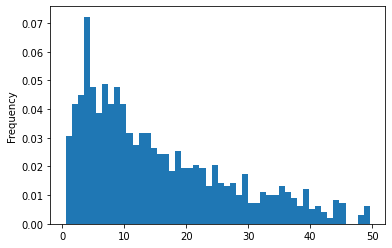

In [14]:
dtc['Gross_income'].plot.hist(bins=50, density=True)

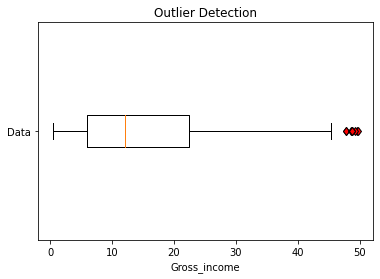

In [15]:
plt.boxplot(dtc['Gross_income'],
            labels=['Data'],
            showfliers=True,
            vert=False,
            flierprops={
                'markerfacecolor': 'r',
                'marker': 'd'
            })
plt.title('Outlier Detection')
plt.xlabel('Gross_income')
plt.ylabel('')
plt.show()

##**REMOVE OUTLIER :**

In [16]:
quartiles = np.percentile(dtc['Gross_income'], [25, 50, 75])
print(quartiles)

[ 5.924875 12.088    22.44525 ]


In [17]:
data_min, data_max = dtc['Gross_income'].min(), dtc['Gross_income'].max()
print(data_min)
print(data_max)
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

0.5085
49.65
Min: 0.508
Q1: 5.925
Median: 12.088
Q3: 22.445
Max: 49.650


In [18]:
out_abv = quartiles[2]+1.5*(quartiles[2]-quartiles[0])
out_abv

47.22581249999999

In [19]:
dtc_filt = dtc[dtc['Gross_income'] <= 47.225]
dtc_filt.head()

,Invoice_id,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,date,Time,Payment,Cogs,Gross_margin_percent,Gross_income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Feb


##**OUTLIER CHECKING :**

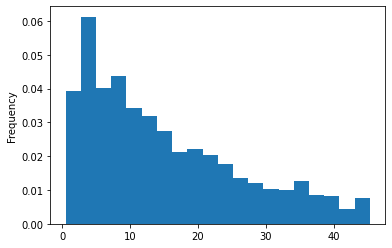

In [20]:
dtc_filt['Gross_income'].plot.hist(bins=20, density=True)

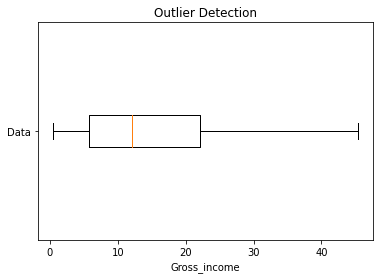

In [21]:
plt.boxplot(dtc_filt['Gross_income'],
            labels=['Data'],
            showfliers=False,
            vert=False,
            flierprops={
                'markerfacecolor': 'r',
                'marker': 'd'
            })
plt.title('Outlier Detection')
plt.xlabel('Gross_income')
plt.ylabel('')
plt.show()

In [22]:
dtc_filt.groupby('Customer_type').count()

,Invoice_id,Branch,City,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,date,Time,Payment,Cogs,Gross_margin_percent,Gross_income,Rating,Month
Customer_type,,,,,,,,,,,,,,,,,
Member,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498
Normal,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493


In [23]:
dtc_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Invoice_id            991 non-null    object 
 1   Branch                991 non-null    object 
 2   City                  991 non-null    object 
 3   Customer_type         991 non-null    object 
 4   Gender                991 non-null    object 
 5   Product_line          991 non-null    object 
 6   Unit_price            991 non-null    float64
 7   Quantity              991 non-null    int64  
 8   Tax_5%                991 non-null    float64
 9   Total                 991 non-null    float64
 10  date                  991 non-null    object 
 11  Time                  991 non-null    object 
 12  Payment               991 non-null    object 
 13  Cogs                  991 non-null    float64
 14  Gross_margin_percent  991 non-null    float64
 15  Gross_income          9

#**Measure of Central Tendency :**
*   Mean (Nilai rata-rata)
*   Median (Nilai tengah)
*   Mode (Nilai yang paling sering muncul)

In [24]:
CT1 = ['Unit_price','Tax_5%','Total','Cogs','Gross_margin_percent','Gross_income','Rating']
for col in CT1:
    print ('Mean ' + dtc_filt[col].name + ' = ' + str(dtc_filt[col].mean()))

Mean Unit_price = 55.292482341069615
Mean Tax_5% = 15.07641675075681
Mean Total = 316.60475176589335
Mean Cogs = 301.5283350151365
Mean Gross_margin_percent = 4.761904762000062
Mean Gross_income = 15.07641675075681
Mean Rating = 6.979717457114031


In [25]:
CT2 = ['Unit_price','Tax_5%','Total','Cogs','Gross_margin_percent','Gross_income','Rating']
for col in CT2:
    print ('Median ' + dtc_filt[col].name + ' = ' + str(dtc_filt[col].median()))

Median Unit_price = 54.84
Median Tax_5% = 12.036
Median Total = 252.75599999999997
Median Cogs = 240.72
Median Gross_margin_percent = 4.7619047619999995
Median Gross_income = 12.036
Median Rating = 7.0


In [26]:
CT2 = ['Unit_price','Tax_5%','Total','Cogs','Gross_margin_percent','Gross_income','Rating']
for col in CT2:
    print ('Mode ' + dtc_filt[col].name + ' = ' + str(dtc_filt[col].median()))

Mode Unit_price = 54.84
Mode Tax_5% = 12.036
Mode Total = 252.75599999999997
Mode Cogs = 240.72
Mode Gross_margin_percent = 4.7619047619999995
Mode Gross_income = 12.036
Mode Rating = 7.0


In [27]:
CTO = ['Branch','City','Total','Customer_type','Gender','Product_line','Payment','Month']
for col in CTO:
    print ('Modus ' + dtc_filt[col].name + ' = ' + str(dtc_filt[col].mode()[0]))

Modus Branch = A
Modus City = Yangon
Modus Total = 87.234
Modus Customer_type = Member
Modus Gender = Male
Modus Product_line = Fashion accessories
Modus Payment = Cash
Modus Month = Jan


##**Measure of Variance :**
*   Measure of Variance: Range
*   Measure of Variance: Variance
*   Measure of Variance: Standard Deviation

In [28]:
VarR = ['Unit_price','Tax_5%','Total','Cogs','Gross_margin_percent','Gross_income','Rating']
for col in VarR:
    print ('Range ' + dtc_filt[col].name + ' = ' + str(dtc_filt[col].max() - dtc_filt[col].min()))

Range Unit_price = 89.88
Range Tax_5% = 44.816500000000005
Range Total = 941.1465000000001
Range Cogs = 896.33
Range Gross_margin_percent = 0.0
Range Gross_income = 44.816500000000005
Range Rating = 6.0


In [29]:
Var = ['Unit_price','Tax_5%','Total','Cogs','Gross_margin_percent','Gross_income','Rating']
for col in Var:
    print ('Range ' + dtc_filt[col].name + ' = ' + str(dtc_filt[col].var()))

Range Unit_price = 692.3012954479207
Range Tax_5% = 128.13117664078973
Range Total = 56505.848898588345
Range Cogs = 51252.47065631602
Range Gross_margin_percent = 3.869322898649203e-27
Range Gross_income = 128.13117664078973
Range Rating = 2.9479417382706954


In [30]:
Var = ['Unit_price','Tax_5%','Total','Cogs','Gross_margin_percent','Gross_income','Rating']
for col in Var:
    print ('Standard Derivation ' + dtc_filt[col].name + ' = ' + str(dtc_filt[col].std()))

Standard Derivation Unit_price = 26.311619019891587
Standard Derivation Tax_5% = 11.319504257730978
Standard Derivation Total = 237.70958941235068
Standard Derivation Cogs = 226.39008515461984
Standard Derivation Gross_margin_percent = 6.220388170081674e-14
Standard Derivation Gross_income = 11.319504257730978
Standard Derivation Rating = 1.716957116025527


##**DISPLAY PLOT :**

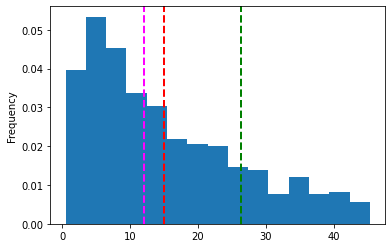

In [31]:
dtc_filt['Gross_income'].plot.hist(bins=15, density=True)
plt.axvline(dtc_filt['Gross_income'].describe()['mean'],
            color='red',
            linestyle='dashed',
            linewidth=2)
plt.axvline(dtc_filt['Gross_income'].describe()['50%'],
            color='magenta',
            linestyle='dashed',
            linewidth=2)
plt.axvline(dtc_filt['Gross_income'].describe()['mean'] +
            dtc_filt['Gross_income'].describe()['std'],
            color='green',
            linestyle='dashed',
            linewidth=2)

##**DISTRIBUTION FIT :**

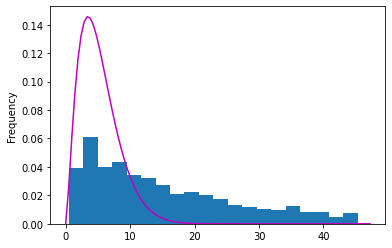

In [32]:
from scipy.stats import beta as beta_fun

fig, ax = plt.subplots(1, 1)
dtc_filt['Gross_income'].plot.hist(bins=20, density=True)

alpha = 2.5
beta = 20
x = np.linspace(0, 1, 100)
plt.plot(47.225 * x,
         beta_fun.pdf(x, alpha, beta) / 47.225,
         'm-',
         lw=1.5,
         alpha=1,
         label='norm pdf')

x = np.linspace(0, 47.225, 100)
plt.plot(x,
         norm.pdf(x, dtc_filt['Gross_income'].describe()['mean'],
                  dtc_filt['Gross_income'].describe()['std']-100),
         'r-',
         lw=1.5,
         alpha=1,
         label='expon pdf')

In [33]:
exp_value = alpha/(alpha+beta)*47.225
print(exp_value)

5.247222222222222


##**CONFIDENCE INTERVAL :**

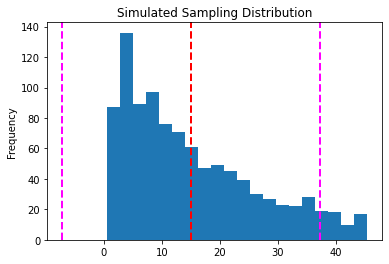

Sampling Mean: 15.07641675075681
Sampling Std: 11.319504257730978
95% Confidence Interval: (-7.109403917243704, 37.26223741875732)


In [34]:
means = dtc_filt['Gross_income']
m = means.mean()
sd = means.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
means.plot.hist(title='Simulated Sampling Distribution', bins=20) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling Std: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

##**TWO SAMPLE TESTING :**

(Member vs Non Member)

Two sample testing digunakan untuk membandingkan apakah terdapat perbedaan nilai rata rata antara kedua grup secara singnifikan atau apakah hanya karena random chance. Metode ini membantu untuk menjawab pertanyaan seperti apakah pelanggan dengan member memiliki pengaruh terhadap Gross Income.

In [35]:
dtc_make_smy=dtc_filt.groupby('Customer_type').agg({'Gross_income':['count','mean']}).reset_index()
dtc_make_smy.columns = dtc_make_smy.columns.droplevel()

In [36]:
dtc_make_smy.sort_values('count',ascending=False).head()

,,count,mean
0,Member,498,15.406926
1,Normal,493,14.742556


In [37]:
dtc_member = dtc_filt[dtc_filt['Customer_type'] == 'Member']
dtc_normal = dtc_filt[dtc_filt['Customer_type'] == 'Normal']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


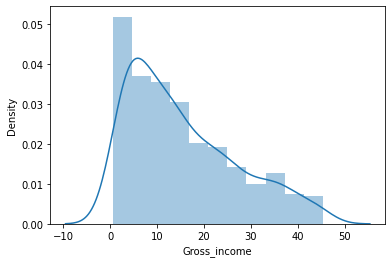

In [38]:
sns.distplot(dtc_member['Gross_income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


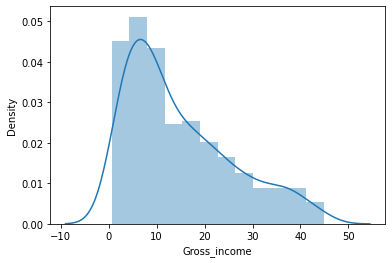

In [39]:
sns.distplot(dtc_normal['Gross_income'])

Member sample mean:15.406925702811247
Member sample std:11.55240693250141
Member Kurtosis:-0.30543442158994694
Non Member sample mean:14.742555780933067
t-statistic:-0.9239383869237462
p-value:0.177872


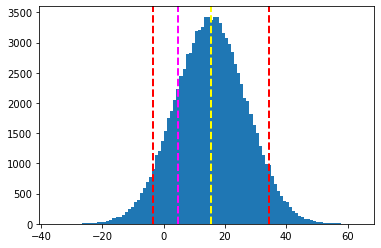

In [40]:
np.random.seed(123)
nonMath =dtc_member['Gross_income']
math = dtc_normal['Gross_income']
print("Member sample mean:" + str(nonMath.mean()))
print("Member sample std:" + str(nonMath.std()))
print("Member Kurtosis:" + str(nonMath.kurtosis()))
print("Non Member sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Hipotesis nol (H0) adalah bahwa nilai rata-rata populasi untuk pelanggan kategori member kurang dari nilai rata-rata populasi untuk pelanggan non-member (normal), dan sampel ini memiliki arti jika pelanggan non-member lebih tinggi dari pada rata-rata sampel untuk pelanggan member, dapat dijelaskan secara acak dalam pemilihan sampel.


Hipotesis alternatif (H1) adalah bahwa nilai rata-rata populasi pelanggan untuk kategori member lebih besar dari nilai rata-rata untuk populasi pelanggan Non-member.

> H0 = V1 <= V2

> H1 = V1 > V2

> V1 = MEMBER

> V2 = NON MEMBER

Ini menunjukkan bahwa hipotesis tidak memiliki cukup bukti untuk mengatakan bahwa pelanggan member memiliki nilai rata-rata yang lebih tinggi daripada pelanggan Non member, jadi H1 ditolak.

##**TWO SAMPLE TESTING :**

(Male vs Female)

In [41]:
dtc_make_smy=dtc_filt.groupby('Gender').agg({'Gross_income':['count','mean']}).reset_index()
dtc_make_smy.columns = dtc_make_smy.columns.droplevel()

In [42]:
dtc_make_smy.sort_values('count',ascending=False).head()

,,count,mean
1,Male,496,14.594585
0,Female,495,15.559222


In [43]:
dtc_male = dtc_filt[dtc_filt['Gender'] == 'Male']
dtc_female = dtc_filt[dtc_filt['Gender'] == 'Female']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


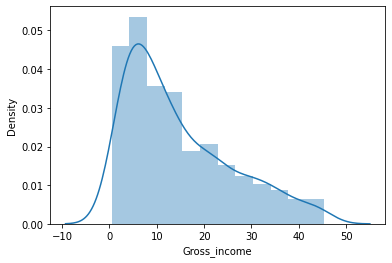

In [44]:
sns.distplot(dtc_male['Gross_income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


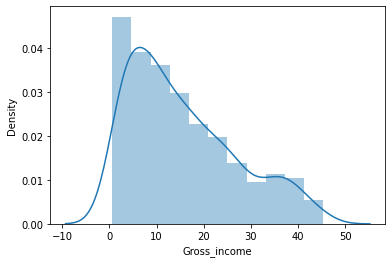

In [45]:
sns.distplot(dtc_female['Gross_income'])

Female sample mean:15.559222222222227
Female sample std:11.376801908092759
Female Kurtosis:-0.36427773073639935
Male sample mean:14.594584677419359
t-statistic:-1.3418813301589028
p-value:0.089971


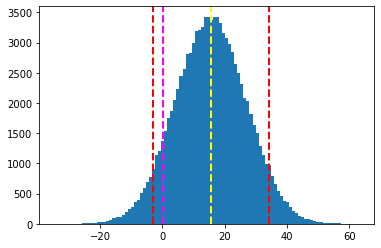

In [46]:
np.random.seed(123)
math = dtc_male['Gross_income']
nonMath =dtc_female['Gross_income']
print("Female sample mean:" + str(nonMath.mean()))
print("Female sample std:" + str(nonMath.std()))
print("Female Kurtosis:" + str(nonMath.kurtosis()))
print("Male sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Hipotesis nol (H0) adalah bahwa nilai rata-rata populasi untuk pelanggan wanita kurang dari nilai rata-rata populasi untuk pelanggan laki-laki.

Hipotesis alternatif (H1) adalah bahwa nilai rata-rata populasi pelanggan kategori Perempuan yang sebenarnya lebih besar dari nilai rata-rata populasi pelanggan Laki-laki.

> H0 = V1 <= V2

> H1 = V1 > V2

> V1 = Female

> V2 = Male

Jadi untuk kesimpulan menolak H1 dan menerima H0.

**Plotting Gross Income menggunakan Violinplot**

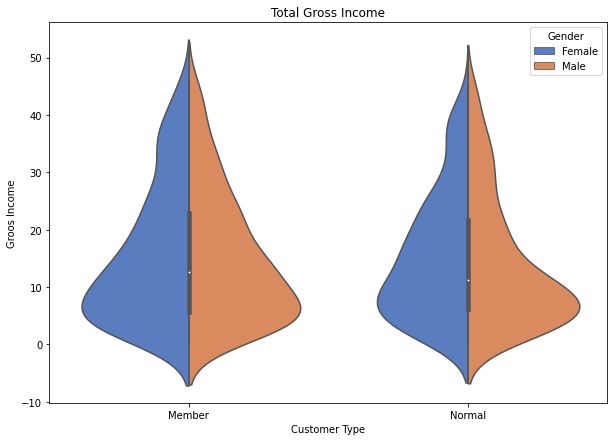

In [47]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Customer_type',
               y='Gross_income',
               hue="Gender",
               data=dtc_filt,
               palette="muted",
               split=True)
plt.xlabel('Customer Type')
plt.ylabel("Groos Income")
plt.title("Total Gross Income")
plt.show()

Member dan Non-member memiliki distribusi yang sama bila dilihat berdasarkan pendapatan kotor masing-masing kelompok Gender pelanggan.

Kesimpulan :

* Promosi dapat dilakukan untuk member dan non-member dari setiap gender karena mereka memiliki distribusi yang sama.
* Jika ingin menambah jumlah member, masih banyak pelanggan normal (non-member) yang bisa dipengaruhi.

**Menyimpan data yang sudah melalui proses Cleaning dalam bentuk CSV**

In [48]:
dtc_filt.to_csv('supermarket_clean.csv')